In [10]:
# https://github.com/yasserius/mapshaper_geojson_simplify

import networkx as nx
import osmnx as ox
import taxicab as tc
import geopandas as gpd
import geocoder
import json
import time
import socket

In [11]:
# Define the location
location = "Cambridge, MA, USA"

# Download the street network
graph = ox.graph_from_place(location, network_type='drive')

# Convert the graph to GeoDataFrames
nodes, edges = ox.graph_to_gdfs(graph)

# Convert the GeoDataFrame to GeoJSON
geojson = json.loads(edges.to_json())

# Save the GeoJSON to a file
#with open('cambridge_roads.geojson', 'w') as f:
 #   json.dump(geojson, f)

In [12]:
json_activities = {
  "Profile": {
    "Name": "John Smith",
    "Age": 26,
    "Nationality": "American",
    "Academic Background": "University of California, Berkeley",
    "Research Interests": ["Sustainable urban systems", "Equitable city design", "Resilience in urban infrastructure", "Data-driven urban planning", "Smart cities"],
    "Residence": "303 3rd St, Cambridge, MA 02142, USA",
    "Personal Interests": ["Cycling", "Sustainability", "Reading", "Cooking", "Podcasts", "Photography"],
    "Skills": ["Python", "R", "GIS", "Basic machine learning", "Communication", "Data analysis", "Project management"]
  },
  "Day Schedule": {
    "MatrixName": "John Smith's Daily Activities",
    "Activities": [
      {"Time": 0, "Activity": "Sleep", "Address": "303 3rd St, Cambridge, MA 02142, USA", "Transportation": "Stay"},
      {"Time": 420, "Activity": "Wake up, Stretch, Prepare breakfast", "Address": "303 3rd St, Cambridge, MA 02142, USA", "Transportation": "Stay"},
      {"Time": 480, "Activity": "Reading research articles and papers", "Address": "303 3rd St, Cambridge, MA 02142, USA", "Transportation": "Stay"},
      {"Time": 540, "Activity": "Bike ride to MIT campus", "Address": "MIT Campus, Cambridge, MA 02142, USA", "Transportation": "Bike"},
      {"Time": 600, "Activity": "Independent study and research", "Address": "MIT Media Lab, 75 Amherst St, Cambridge, MA 02139, USA", "Transportation": "Stay"},
      {"Time": 660, "Activity": "Attend seminar on sustainable urban development at Bartos Theater", "Address": "20 Ames St, Cambridge, MA 02142, USA", "Transportation": "Walk"},
      {"Time": 720, "Activity": "Lunch preparation", "Address": "303 3rd St, Cambridge, MA 02142, USA", "Transportation": "Stay"},
      {"Time": 780, "Activity": "Lunch at Clover Food Lab food truck", "Address": "Kendall Square, Cambridge, MA 02142, USA", "Transportation": "Bike"},
      {"Time": 840, "Activity": "Research and project work at MIT Media Lab", "Address": "75 Amherst St, Cambridge, MA 02139, USA", "Transportation": "Walk"},
      {"Time": 900, "Activity": "Attend data visualization workshop at MIT Libraries", "Address": "160 Memorial Dr, Cambridge, MA 02142, USA", "Transportation": "Walk"},
      {"Time": 960, "Activity": "Independent study and research", "Address": "MIT Media Lab, 75 Amherst St, Cambridge, MA 02139, USA", "Transportation": "Stay"},
      {"Time": 1020, "Activity": "Group meeting at R&D Commons", "Address": "32 Vassar St, Cambridge, MA 02139, USA", "Transportation": "Walk"},
      {"Time": 1080, "Activity": "Workout and swim at Zesiger Sports and Fitness Center", "Address": "120 Vassar St, Cambridge, MA 02139, USA", "Transportation": "Walk"},
      {"Time": 1140, "Activity": "Bike ride back to the apartment and prepare dinner", "Address": "303 3rd St, Cambridge, MA 02142, USA", "Transportation": "Bike"},
      {"Time": 1200, "Activity": "Dinner at home", "Address": "303 3rd St, Cambridge, MA 02142, USA", "Transportation": "Stay"},
      {"Time": 1260, "Activity": "Reading book / Podcast", "Address": "303 3rd St, Cambridge, MA 02142, USA", "Transportation": "Stay"},
      {"Time": 1320, "Activity": "Review of next day's tasks", "Address": "303 3rd St, Cambridge, MA 02142, USA", "Transportation": "Stay"},
      {"Time": 1380, "Activity": "Sleep", "Address": "303 3rd St, Cambridge, MA 02142, USA", "Transportation": "Stay"}
    ]
  }
}

In [13]:
activities = json_activities
#json.loads(json_activities)
#activities = json.loads(json_activities)
chagpt_locations = []

# Iterate over each activity in the schedule
for activity in activities["Day Schedule"]["Activities"]:
    # Extract and print the Address
    location = activity["Address"]
    chagpt_locations.append(location)
    print(location)
    
print(chagpt_locations[0])
profileName =  activities["Profile"]
porfile_id = 0

303 3rd St, Cambridge, MA 02142, USA
303 3rd St, Cambridge, MA 02142, USA
303 3rd St, Cambridge, MA 02142, USA
MIT Campus, Cambridge, MA 02142, USA
MIT Media Lab, 75 Amherst St, Cambridge, MA 02139, USA
20 Ames St, Cambridge, MA 02142, USA
303 3rd St, Cambridge, MA 02142, USA
Kendall Square, Cambridge, MA 02142, USA
75 Amherst St, Cambridge, MA 02139, USA
160 Memorial Dr, Cambridge, MA 02142, USA
MIT Media Lab, 75 Amherst St, Cambridge, MA 02139, USA
32 Vassar St, Cambridge, MA 02139, USA
120 Vassar St, Cambridge, MA 02139, USA
303 3rd St, Cambridge, MA 02142, USA
303 3rd St, Cambridge, MA 02142, USA
303 3rd St, Cambridge, MA 02142, USA
303 3rd St, Cambridge, MA 02142, USA
303 3rd St, Cambridge, MA 02142, USA
303 3rd St, Cambridge, MA 02142, USA


In [14]:
g = geocoder.tomtom('San Francisco, CA', key='S5gXe7d9lxpiWwDFIRuOjR3qAxcN3qJZ')

In [15]:
real_geo_locations_lat = []
real_geo_locations_lng = []
real_geo_locations = []

#making an instance of Nominatim class
#geolocator = Nominatim(user_agent="my_request")
 
#applying geocode method to get the location
for location in chagpt_locations: 
    #new_realtime = geolocator.geocode(location)
    print(location)
    new_realtime = geocoder.tomtom(location, key='S5gXe7d9lxpiWwDFIRuOjR3qAxcN3qJZ')
    print(new_realtime)
    print(new_realtime.lat)
    print(new_realtime.lng)
    real_geo_locations_lat.append(new_realtime.lat)
    real_geo_locations_lng.append(new_realtime.lng)
    real_geo_locations.append(new_realtime)
#     time.sleep(2)

303 3rd St, Cambridge, MA 02142, USA
<[OK] Tomtom - Geocode [303 3rd Street, Cambridge, MA 02142]>
42.36458
-71.08401
303 3rd St, Cambridge, MA 02142, USA
<[OK] Tomtom - Geocode [303 3rd Street, Cambridge, MA 02142]>
42.36458
-71.08401
303 3rd St, Cambridge, MA 02142, USA
<[OK] Tomtom - Geocode [303 3rd Street, Cambridge, MA 02142]>
42.36458
-71.08401
MIT Campus, Cambridge, MA 02142, USA
<[OK] Tomtom - Geocode [Cambridge, MA 02142]>
42.36225
-71.08473
MIT Media Lab, 75 Amherst St, Cambridge, MA 02139, USA
<[OK] Tomtom - Geocode [75 Amherst Street, Cambridge, MA 02142]>
42.36038
-71.08731
20 Ames St, Cambridge, MA 02142, USA
<[OK] Tomtom - Geocode [20 Ames Street, Cambridge, MA 02142]>
42.36065
-71.08744
303 3rd St, Cambridge, MA 02142, USA
<[OK] Tomtom - Geocode [303 3rd Street, Cambridge, MA 02142]>
42.36458
-71.08401
Kendall Square, Cambridge, MA 02142, USA
<[OK] Tomtom - Geocode [Kendall Square, Cambridge, MA 02141]>
42.36798
-71.08995
75 Amherst St, Cambridge, MA 02139, USA
<[OK] T

In [16]:
coord_lat=[];
coord_lng=[];
coord_time=[];
status=[];

# Check if the number of new locations matches the number of activities in the schedule

if len(real_geo_locations) != len(activities["Day Schedule"]["Activities"]):
    print("The number of new locations must match the number of activities.")
else:
    # Iterate over each activity and update the location
    for activity, lat, lng in zip(activities["Day Schedule"]["Activities"], real_geo_locations_lat, real_geo_locations_lng):
        activity['lat'] = lat
        activity['log'] = lng
        
        coord_lat.append(lat);
        coord_lng.append(lng);
        
        #activities.update(activity)

# Convert the updated data back to a JSON string
updated_json_string = json.dumps(activities, indent=2)


In [17]:
#copy time

for activity in activities["Day Schedule"]["Activities"]:
    # Extract and print the Address
    coord_time.append(activity["Time"])
    status.append(activity["Transportation"])
    

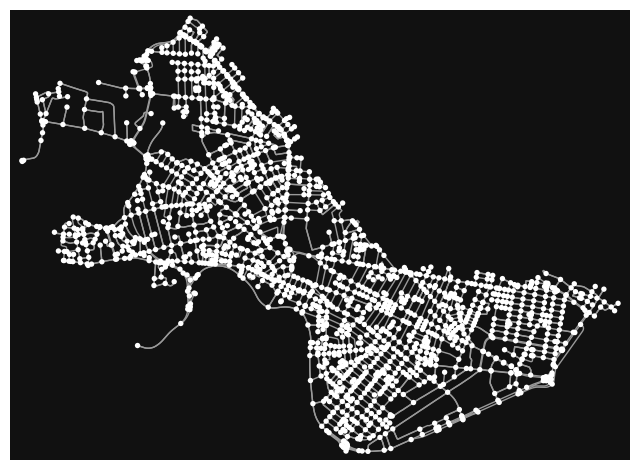

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [18]:
import osmnx as ox

# Define the location
location = "Cambridge, MA, USA"

# Download the street network
graph = ox.graph_from_place(location, network_type='drive')

ox.plot_graph(graph)

In [19]:
# generate parths based on the agents positions

orig = ox.nearest_nodes(graph, -71.08401, 42.36458)
dest = ox.nearest_nodes(graph,  -71.0961, 42.35856)
route = nx.shortest_path(graph, orig, dest)

rou = nodes.loc[route];
#print(nodes.loc[route])
# print(rou.index.tolist())

routes = [];

for i in range(len(coord_lat) - 1):
    origl = ox.nearest_nodes(graph, coord_lng[i], coord_lat[i])
    destl = ox.nearest_nodes(graph, coord_lng[i+1], coord_lat[i+1])
    route = nx.shortest_path(graph, origl, destl, weight='travel_time')
    #route = tc.distance.shortest_path(graph, (coord_lng[i], coord_lat[i]),  (coord_lng[i+1], coord_lat[i+1]))
    routes.append(route)

In [20]:
#generate time table based on the agents location
import math

print(len(routes))
print(len(coord_lat))

for route_nodes in routes:
    for row in route_nodes:
        node_attr1 = nodes.loc[row]['geometry'].x
        node_attr2 = nodes.loc[row]['geometry'].y

print("adding time")
for i in range(len(coord_time)-1):
    start_time = coord_time[i]
    end_time = coord_time[i+1]
    #print("start: "+str(start_time)+" end time: "+str(end_time))
    
    
timeSteps = []
positions = []
statusJSON = []
    
for route_nodes, start_time, end_time, st in zip(routes, coord_time[:-1], coord_time[1:], status):
    
    print("start: " + str(start_time) + " end: " + str(end_time))
    
    # include starting point
   # timeSteps.append(start_time)
    for row, index in zip(route_nodes, range(len(route_nodes))):
        node_attr1 = nodes.loc[row]['geometry'].x
        node_attr2 = nodes.loc[row]['geometry'].y
        
        inc = end_time- start_time
        step = math.ceil((index)/(len(route_nodes)) * inc)
        
    
        
        #if index == 0 :
        #    positions.append([node_attr1, node_attr1])
        
        #print(str(index)+": ")
        print((start_time + step))
        print(index)
        #print(str(node_attr1)+" "+str(node_attr2))
                
        positions.append([node_attr1, node_attr2])
        timeSteps.append(start_time + step)
        statusJSON.append(st)
        
print(len(timeSteps))
print(len(positions))
print(len(statusJSON))


    #print("start: " + str(start_time) + " end: " + str(end_time))

17
18
adding time
start: 0 end: 420
0
0
start: 420 end: 480
420
0
start: 480 end: 540
480
0
489
1
498
2
506
3
515
4
523
5
532
6
start: 540 end: 600
540
0
560
1
580
2
start: 600 end: 660
600
0
start: 660 end: 720
660
0
667
1
674
2
680
3
687
4
694
5
700
6
707
7
714
8
start: 720 end: 780
720
0
726
1
732
2
738
3
744
4
750
5
756
6
762
7
768
8
774
9
start: 780 end: 840
780
0
788
1
795
2
803
3
810
4
818
5
825
6
833
7
start: 840 end: 900
840
0
start: 900 end: 960
900
0
start: 960 end: 1020
960
0
980
1
1000
2
start: 1020 end: 1080
1020
0
1040
1
1060
2
start: 1080 end: 1140
1080
0
1087
1
1094
2
1100
3
1107
4
1114
5
1120
6
1127
7
1134
8
start: 1140 end: 1200
1140
0
start: 1200 end: 1260
1200
0
start: 1260 end: 1320
1260
0
start: 1320 end: 1380
1320
0
61
61
61


In [21]:
#add to json
json_activities_udp = [
  {
    "Person_id": 0,
    "Profile": {},
    "coords": [
    ],
    "timestamps": [
    ],
    "status": [
    ]
  }
]

json_activities_udp[porfile_id]["person_id"] = porfile_id
#json_activities_udp[porfile_id]["Profile"]  = profileName;
json_activities_udp[porfile_id]["coords"]  = positions;
json_activities_udp[porfile_id]["timestamps"]  = timeSteps;
json_activities_udp[porfile_id]["status"]  = statusJSON;

print(json.dumps(json_activities_udp, indent = 4))

[
    {
        "Person_id": 0,
        "Profile": {},
        "coords": [
            [
                -71.0847663,
                42.3643983
            ],
            [
                -71.0847663,
                42.3643983
            ],
            [
                -71.0847663,
                42.3643983
            ],
            [
                -71.083472,
                42.363851
            ],
            [
                -71.0837939,
                42.3633621
            ],
            [
                -71.0843304,
                42.3627158
            ],
            [
                -71.084407,
                42.3626521
            ],
            [
                -71.0851555,
                42.3623725
            ],
            [
                -71.085167,
                42.362326
            ],
            [
                -71.085167,
                42.362326
            ],
            [
                -71.0853823,
                42.3607721
            

In [22]:
def send_json_via_udp(json_data, host, port):
    # Convert JSON data to string
    
    json_str = json.dumps(json_data, indent=2)

    # Create a UDP socket
    udp_socket = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)

    try:
        # Send the JSON string over UDP
        udp_socket.sendto(json_str.encode('utf-8'), (host, port))
        print("JSON data sent successfully via UDP.")
    finally:
        # Close the UDP socket
        udp_socket.close()

In [23]:
# UDP server details
host = '127.0.0.1'  # Replace with the actual server IP address
port = 15800        # Replace with the actual server port number

# Send JSON data via UDP
send_json_via_udp(json_activities_udp, host, port)

JSON data sent successfully via UDP.


In [24]:
# hour interate 60 times per segment, 
start = 0
end = len(routes)

# Iterate over the range
for i in range(start, end):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


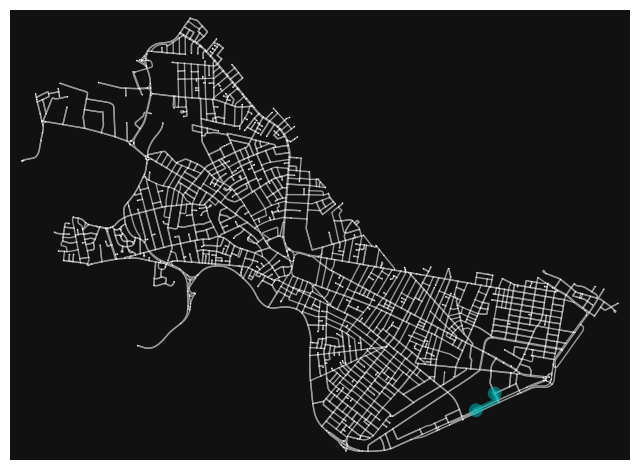

In [25]:
#route = ox.shortest_path(graph, orig, dest)
fig, ax = ox.plot_graph_route(graph, routes[10], route_color="c", node_size=1)


In [26]:
print(route)

[61327022]


In [27]:
route = nx.shortest_path(graph, orig, dest, weight='length')
route_nodes = nodes.loc[route]

In [28]:
route_nodes
coords = [];

for index, node in route_nodes.iterrows():
    # Access individual node attributes
    node_id = index
    
    node_attr1 = node['geometry'].x
    node_attr2 = node['geometry'].y
    coords.append([node['geometry'].x, node['geometry'].x]);
    
    # Perform desired operations with the node attributes
    print(f"Node ID: {node_id}, Attribute 1: {node_attr1}, Attribute 2: {node_attr2}")

    

Node ID: 61327022, Attribute 1: -71.0847663, Attribute 2: 42.3643983
Node ID: 61318627, Attribute 1: -71.083472, Attribute 2: 42.363851
Node ID: 61318626, Attribute 1: -71.0837939, Attribute 2: 42.3633621
Node ID: 1052761909, Attribute 1: -71.0843304, Attribute 2: 42.3627158
Node ID: 1052777483, Attribute 1: -71.084407, Attribute 2: 42.3626521
Node ID: 8602936356, Attribute 1: -71.0851555, Attribute 2: 42.3623725
Node ID: 61283373, Attribute 1: -71.085167, Attribute 2: 42.362326
Node ID: 61322085, Attribute 1: -71.0853823, Attribute 2: 42.3607721
Node ID: 61328027, Attribute 1: -71.0876473, Attribute 2: 42.3600117
Node ID: 61317281, Attribute 1: -71.0871703, Attribute 2: 42.3592337
Node ID: 61317284, Attribute 1: -71.090535, Attribute 2: 42.3581085
Node ID: 61327635, Attribute 1: -71.0947599, Attribute 2: 42.3566942
Node ID: 61327823, Attribute 1: -71.0950896, Attribute 2: 42.3572332


In [29]:
for activity in activities["Day Schedule"]["Activities"]:
    time = activity["Time"]
   

In [30]:
# Convert the graph to GeoDataFrames
nodes, edges = ox.graph_to_gdfs(graph)

print(edges)

                                                   osmid   lanes  \
u           v          key                                         
61182955    61323200   0                         9429431       2   
61283119    61283126   0                         8615341       1   
            61321743   0                         8616058       2   
            61283322   0                         8616167       1   
61283126    61321144   0                         8615341       1   
...                                                  ...     ...   
11010636782 61325588   0         [1185432171, 827985917]  [4, 2]   
11011483244 61324449   0    [8615770, 8614820, 50446847]  [2, 3]   
            61325617   0                      1188543895       3   
11011483260 61321986   0           [8616153, 1185426905]       1   
            1839951959 0            [8615560, 524605932]       1   

                                        name      highway          maxspeed  \
u           v          key          

In [31]:
import fiona
import json

In [32]:

schema = {
    'geometry':'LineString',
    'properties':[('Name','str')]
}

In [33]:
#open a fiona object
lineShp = fiona.open('BASEMAP_Roads/BASEMAP_Roads.shp', mode='w', driver='ESRI Shapefile',
          schema = schema, crs = "EPSG:4326")

DriverIOError: Failed to create file BASEMAP_Roads/BASEMAP_Roads.shp: No such file or directory

In [ ]:
lineShp.write()


In [ ]:
nodes.to_file("cambridge_roads_02.geojson", driver='GeoJSON')

In [ ]:
# Save the edges (or nodes) GeoDataFrame to a GeoJSON file
edges.to_file("cambridge_roads_01.geojson", driver='GeoJSON')

In [ ]:
import geopandas

shp_file = geopandas.read_file('BASEMAP_Roads/BASEMAP_Roads.shp')
shp_file.to_file('myshpfile.geojson', driver='GeoJSON')